<a href="https://colab.research.google.com/github/AJAY015/DAV/blob/main/Experiment_2_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTHON**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [74]:
df =  pd.read_csv("/content/student_scores.csv");
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [75]:
# df = df[["car_name","price(in lakhs)"]];
Sumary = df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


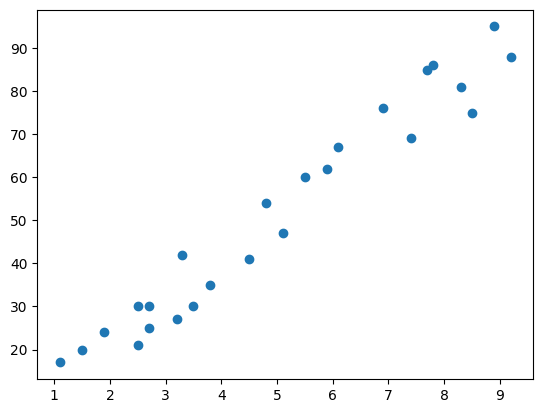

In [77]:
plt.scatter(df['Hours'], df['Scores'])

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

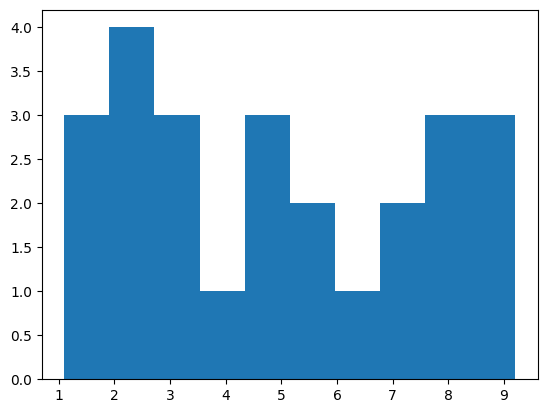

In [78]:
plt.hist(df["Hours"])

In [79]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [80]:
df.isnull().any(axis=0)

Hours     False
Scores    False
dtype: bool

In [82]:
model = LinearRegression()
model.fit(df["Hours"].values.reshape(-1, 1), df["Scores"])

LinearRegression()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

Text(0.01, 0.9, 'y = 2.484 + 9.776 * x')

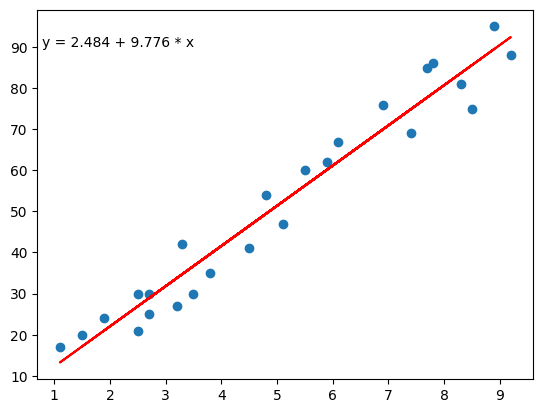

In [85]:
y_pred = model.predict(df["Hours"].values.reshape(-1, 1))
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df["Hours"], y_pred, color="red")
plt.text(0.01, 0.9, f"y = {round(model.intercept_, 3)} + {round(model.coef_[0], 3)} * x", transform=plt.gca().transAxes)

**R**

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv("/content/student_scores.csv")

In [3]:
df = select(df,c("Hours", "Scores"))
head(df)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


In [4]:
summary(df)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

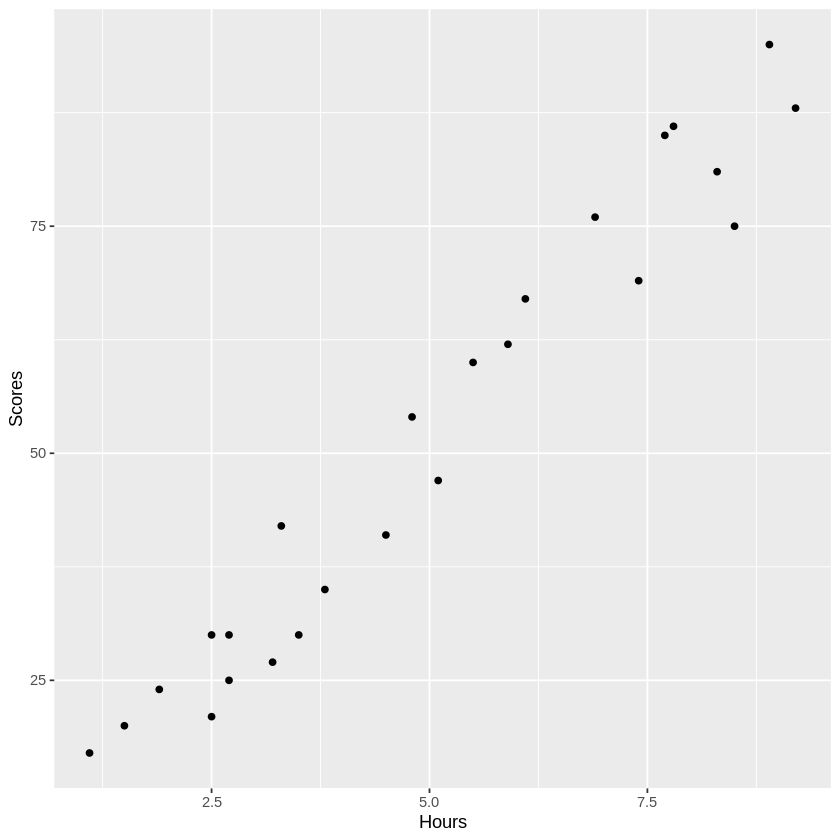

In [6]:
ggplot(df, aes(x=Hours, y=Scores)) +
    geom_point()

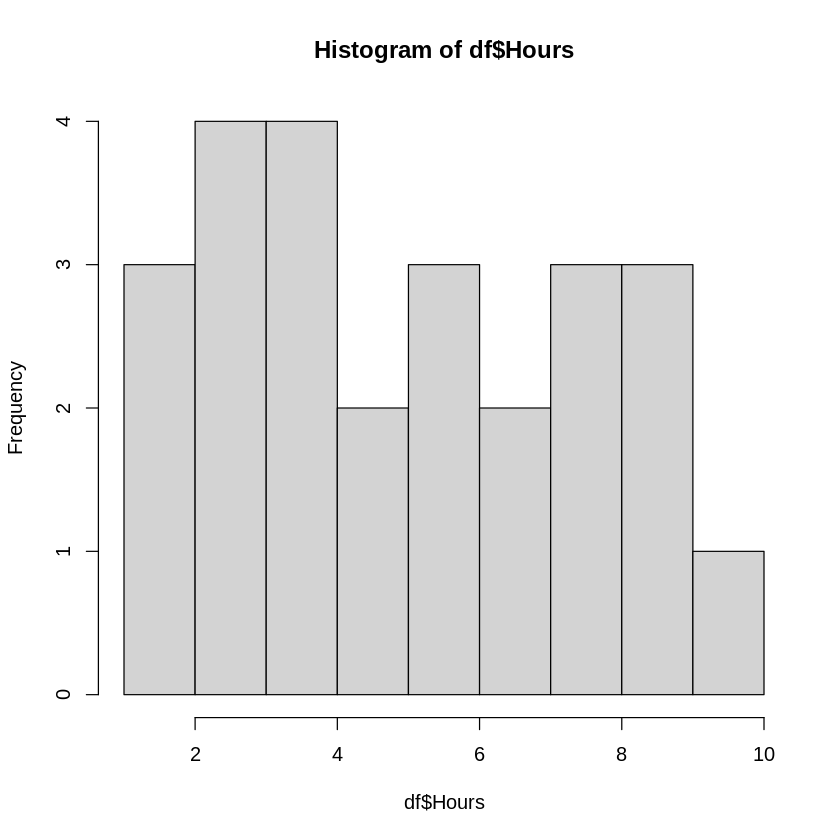

In [7]:
hist(df$Hours)

In [8]:
model = lm(Scores ~ Hours, data=df)
summary(model)


Call:
lm(formula = Scores ~ Hours, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


[1] "y = 2.483673 + 9.775803 * x"

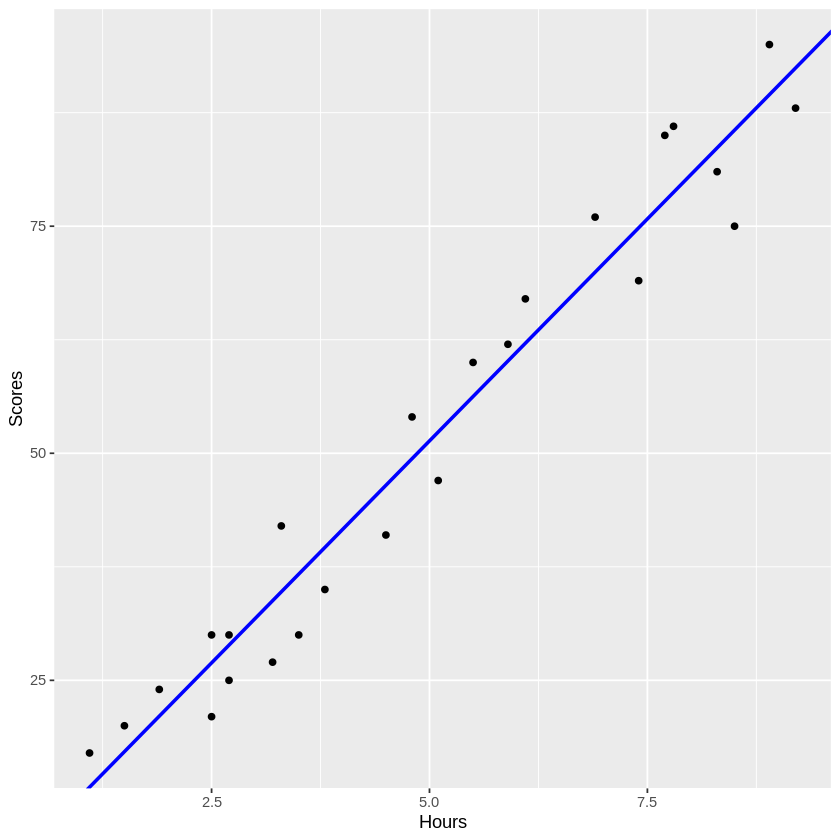

In [9]:
pred <- predict(model, data = df$Scores)
ggplot(df, aes(x=Hours, y=Scores)) +
    geom_point() +
      geom_abline(slope=model$coefficients[2],
              intercept=model$coefficients[1],
              color="blue",
              linewidth=1)
sprintf("y = %f + %f * x", model$coefficients[1], model$coefficients[2])